# Team Project 3 - Solving a System of Linear Equations

In this project, we compare the performance of three different methods of solving a system of linear equations. The lesson that you may get is that finding an efficient method is not an unnecessary complication.

For this project, <b>DO NOT</b> use the 'solve' or 'inv' method in the linear algebra package! You have to create your own code for it.

1. (5 pts) Create a function **randmat(n)** which returns a random square matrix constructed as the following recipe.
<ul>
    <li>The size of the matrix is $n \times n$.</li>
    <li>Each off-diagonal entry ($a_{ij}$ where $i \ne j$) is a random number in $[0, 1)$. A random number can be constructed by the random method (see <a href="https://docs.scipy.org/doc/numpy/reference/routines.random.html">here</a>).</li>
    <li>A diagonal entry $a_{ii}$ is a random number in $[n, n+1)$. (This condition guarantees that the matrix $(a_{ij})$ is strictly diagonally dominant, hence invertible.)</li>
</ul>

And create a function **randvec(n)** which returns an $n$-dimensional random vector whose entries are random numbers in $[0, 100)$.

In [ ]:
import numpy as np

In [ ]:
def randvec(n):
  return np.random.rand(n) * 100

def randmat(n):
  matrix = np.random.random((n,n))
  np.fill_diagonal(matrix, np.random.uniform(n, n+1, size=n))
  for i in range(n):
    for j in range(n):
        if i != j:
          matrix[i][j] = np.random.random()

  return matrix

n = int(input("Enter the n-dimensional size of your matrix: "))

tA = randmat(n)
tb = randvec(n)
#print("Random matrix: \n",randmat(n)) # Diagonals = (n, n+1), non-Diagonals = random[0,1)
#print("Random vector: \n",randvec(n))
print("Random matrix: \n",tA) # Diagonals = (n, n+1), non-Diagonals = random[0,1)
print("Random vector: \n",tb)

2. (10 pts) Create a function **GaussElim(A, b)** which solves a system of linear equations $Ax = b$ by using Gaussian Elimination with the partial pivoting.

In [ ]:
def GaussElim(A,b):
  n = len(b)
  A = A.astype(float)
  b = b.astype(float)

  aug_matrix = np.hstack((A, b.reshape(n, 1)))

  for i in range(n):
    max_row = np.argmax(np.abs(aug_matrix[i:, i])) + i

    if i != max_row:
      aug_matrix[[i, max_row]] = aug_matrix[[max_row, i]]

    # Checks if pivot is zero, executes faster than (np.linalg.det(A) = 0)
    if np.isclose(aug_matrix[i, i], 0):
      print("Singular matrix detected. No unique solution exists.")
      return None

    aug_matrix[i] = aug_matrix[i] / aug_matrix[i, i]
    for j in range(i + 1, n):
      aug_matrix[j] -= aug_matrix[j, i] * aug_matrix[i]

  x = np.zeros(n)
  for i in range(n - 1, -1, -1):
    x[i] = aug_matrix[i, -1] - np.dot(aug_matrix[i, i+1:n], x[i+1:])

  return x

A = np.array([[2, 1, -1],
              [3, 2, 2],
              [1, 1, 1]], dtype=float)

b = np.array([4, 10, 3], dtype=float)
x = GaussElim(A,b)

print("Solution of vector x:", x)

print(GaussElim(tA,tb))
# # Singular Matrix test case

# A = np.array([[2, 1, -1],
#               [4, 2, -2],
#               [1, 1, 1]], dtype=float)  # Second row is 2 * first row

# b = np.array([4, 8, 3], dtype=float)
# print(GaussElim(A, b))

Solution of vector x: [ 4.  -2.5  1.5]
[-4.00379426  6.1273367  10.07098947 12.35024316 11.36155587]


3. (10 pts) Create a function **InvMat(A,b)** which solves a system of linear equations $Ax = b$ with the "theoretically simplest method," that is, computing $x = A^{-1}b$. Compute the inverse matrix as the following:
<ul>
    <li>Make an augmented matrix $[A | I]$ where $I$ is the $n \times n$ identity matrix.</li>
    <li>Apply elementary row operations until the left half $A$ on $[A| I]$ becomes $I$, so it looks $[I | B]$.</li>
    <li>Then the right half of the augmented matrix $B$ is $A^{-1}$.</li>
</ul>

In [ ]:
def InvMat(A,b):
  n = len(A)
  A = A.astype(float)
  b = b.astype(float)

  aug_matrix = np.hstack((A, np.identity(n)))

  # Check if A is square
  if A.shape[0] != A.shape[1]:
      print("Non-Square matrix detected, matrix can not be inverted.")
      return None

  for i in range(n):
    aug_matrix[i] = aug_matrix[i] / aug_matrix[i, i]
    for j in range(i+1, n):
        aug_matrix[j] -= aug_matrix[j, i] * aug_matrix[i]

  for i in range(n-1, -1, -1):
    for j in range(i-1, -1, -1):
      aug_matrix[j] -= aug_matrix[j, i] * aug_matrix[i]

  # Inverse and solution
  A_inv = aug_matrix[:, n:]
  x = np.dot(A_inv, b)
  return x

A = np.array([[2, 1, -1],
              [3, 2, 2],
              [1, 1, 1]], dtype=float)
b = np.array([4, 10, 3], dtype=float)
x = InvMat(A,b)

print("In the format Ax=b, given known values of \nA= \n", A ,"and \nb= \n",b ,"\nUtilizing the inverse matrix, we conclude that\nx =\n ", x)

# # Non-Square matrix test case
# A = np.array([
#     [2, 1],
#     [4, 2],
#     [1, 3]
# ], dtype=float)

# b = np.array([5, 10, 6], dtype=float)
# print(InvMat(A,b))

print(InvMat(tA,tb))

In the format Ax=b, given known values of 
A= 
 [[ 2.  1. -1.]
 [ 3.  2.  2.]
 [ 1.  1.  1.]] and 
b= 
 [ 4. 10.  3.] 
Utilizing the inverse matrix, we conclude that
x =
  [ 4.  -2.5  1.5]
[-4.00379426  6.1273367  10.07098947 12.35024316 11.36155587]


4. (10 pts) Create a function **Jacobi(A, b, err)** which solves a system of linear equations $Ax = b$ by using Jacobi interation method. Set $x^{(0)} = \vec{0}$. We stop the iteration when the estimation of the error $||x^{(k)} - x^{(k-1)}||_\infty$ is less than err or $k = 1000$. (Here $x^{(k)}$ is the $k$-th output of the iteration).




In [ ]:
def Diagonally_dom(A):
  n = len(A)
  for i in range(n):
    if abs(A[i, i]) < sum(abs(A[i, j]) for j in range(n) if j != i):
      return False
  return True

In [ ]:
def Jacobi(A, b, err):
  n = len(A)
  A = A.astype(float)
  b = b.astype(float)

  # Check if A is Diagonally_dominant
  if not Diagonally_dom(A):
    print("Non-Diagonally Dominant Matrix detected. Jacobi Iteration may not converge.")
    return None

  x_old = np.zeros(n)
  D_inv = 1 / np.diag(A)
  R = A - np.diag(np.diag(A))

  k = 1000  # iterations
  for i in range(k):
    x_new = D_inv * (b - np.dot(R, x_old))

    if i % 10 == 0:
      if np.linalg.norm(x_new - x_old, np.inf) < err:
        return x_new

    x_old[:] = x_new

  print(f"Jacobi method did not converge within {k} iterations.")
  return x_new

 #requires a Strictly Diagonally Dominant Matrix
A = np.array([[4, 1, -1],
              [3, 6, 2],
              [1, 1, 5]], dtype=float)
b = np.array([4, 10, 3], dtype=float)
err = 1e-8 # Arbitrary
x = Jacobi(A, b, err)

print("In the format Ax=b, given known values of \nA= \n", A ,"and \nb= \n",b ,"\nUtilizing the Jacobi Iteration Method, we conclude that\nx =\n ", x)

print(Jacobi(tA,tb,0.00001))
# # Non-Diagonally Dominant Matrix test case
# A = np.array([[2, 1, -1],
#               [3, 2, 2],
#               [1, 1, 1]], dtype=float)
# b = np.array([4, 10, 3], dtype=float)
# err = 1e-8
# print(Jacobi(A, b, err))


In the format Ax=b, given known values of 
A= 
 [[ 4.  1. -1.]
 [ 3.  6.  2.]
 [ 1.  1.  5.]] and 
b= 
 [ 4. 10.  3.] 
Utilizing the Jacobi Iteration Method, we conclude that
x =
  [0.74509804 1.22549019 0.20588235]
[-4.00379421  6.12733674 10.07098952 12.35024321 11.36155592]


5. (10 pts) Create a function **GaussSeidel(A, b, err)** which solves a system of linear equations $Ax = b$ by using Gauss-Seidel interation method. Set $x^{(0)} = \vec{0}$. We stop the iteration when the estimation of the error $||x^{(k)} - x^{(k-1)}||_\infty$ is less than err or $k = 1000$. (Here $x^{(k)}$ is the $k$-th output of the iteration).

In [ ]:
def GaussSeidel(A, b, err):
  n = len(A)
  A = A.astype(float)
  b = b.astype(float)

  # Check if A is Diagonally_dominant # utilizes previous function
  if not Diagonally_dom(A):
    print("Non-Diagonally Dominant Matrix detected. Gauss-Seidel Iteration may not converge.")
    return None

  x = np.zeros(n)
  D_inv = 1 / np.diag(A)

  k = 1000  #iterations
  for i in range(k):
    x_old = x.copy()
    for j in range(n):
      sum1 = np.dot(A[j, :j], x[:j])
      sum2 = np.dot(A[j, j+1:], x[j+1:])
      x[j] = D_inv[j] * (b[j] - sum1 - sum2)

    if np.max(np.abs(x - x_old)) < err:
      return x

  print(f"Gauss-Seidel method did not converge within {k} iterations.")
  return x

#requires a Strictly Diagonally Dominant Matrix

A = np.array([[4, 1, -1],
              [3, 6, 2],
              [1, 1, 5]], dtype=float)
b = np.array([4, 10, 3], dtype=float)
err = 1e-8 # Arbitrary
x = GaussSeidel(A, b, err)

print("In the format Ax=b, given known values of \nA= \n", A ,"and \nb= \n",b ,"\nUtilizing the Gauss Seide Iteration Method, we conclude that\nx =\n ", x)

# # Non-Diagonally Dominant Matrix test case
# A = np.array([[2, 1, -1],
#               [3, 2, 2],
#               [1, 1, 1]], dtype=float)
# b = np.array([4, 10, 3], dtype=float)
# err = 1e-8
# print(Jacobi(A, b, err))

print(GaussSeidel(tA,tb,0.00001))

In the format Ax=b, given known values of 
A= 
 [[ 4.  1. -1.]
 [ 3.  6.  2.]
 [ 1.  1.  5.]] and 
b= 
 [ 4. 10.  3.] 
Utilizing the Gauss Seide Iteration Method, we conclude that
x =
  [0.74509804 1.2254902  0.20588235]
[-4.00379507  6.12733646 10.07098969 12.35024327 11.36155591]


6. (5 pts) For $n = 100, 200, 300, \cdots , 1000$, create a random $n \times n$ matrix $A$ and a random $n$-dimensional vector $b$. Solve the system of linear equations $Ax = b$ by using **GaussElim(A, b)**, **InvMat(A, b)**, **Jacobi(A, b, err)**, and **GaussSeidel(A, b, err)**. Use $10^{-6}$ for the error tolerance. Record the excution time for each method. Plot the graph of the excution time for those three methods on the same plane.

For the computation of the excution time, you may use the following method:

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import time

start = time.time()
"the code you want to test stays here"
end = time.time()

print(end - start)

5.507469177246094e-05


Matrix Size: 100x100
Matrix Size: 200x200
Matrix Size: 300x300
Matrix Size: 400x400
Matrix Size: 500x500
Matrix Size: 600x600
Matrix Size: 700x700
Matrix Size: 800x800
Matrix Size: 900x900
Matrix Size: 1000x1000


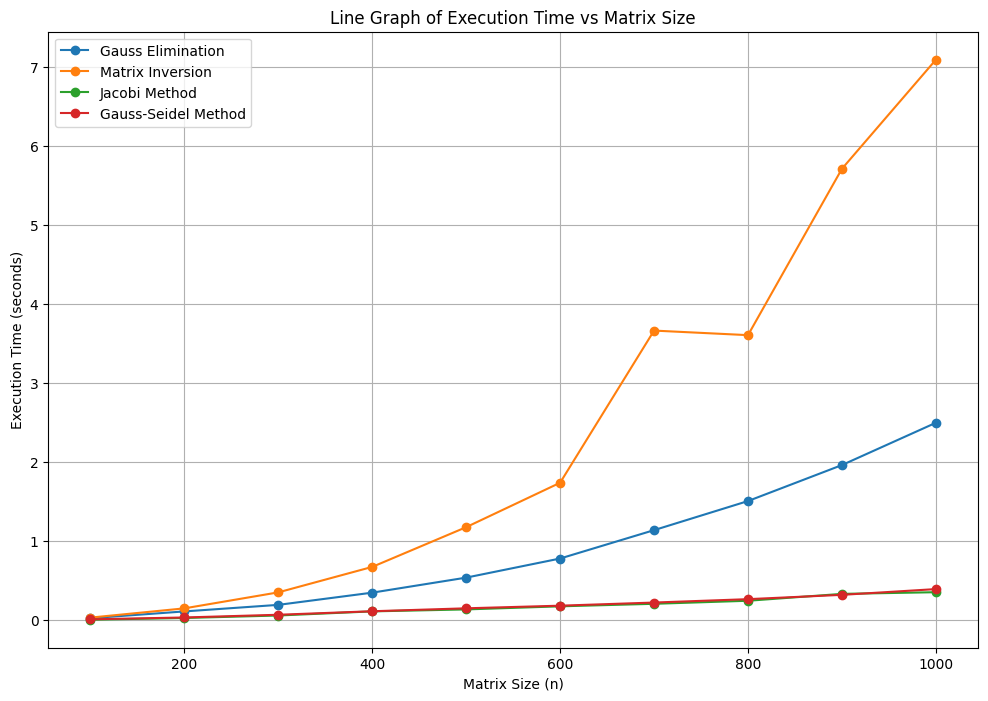

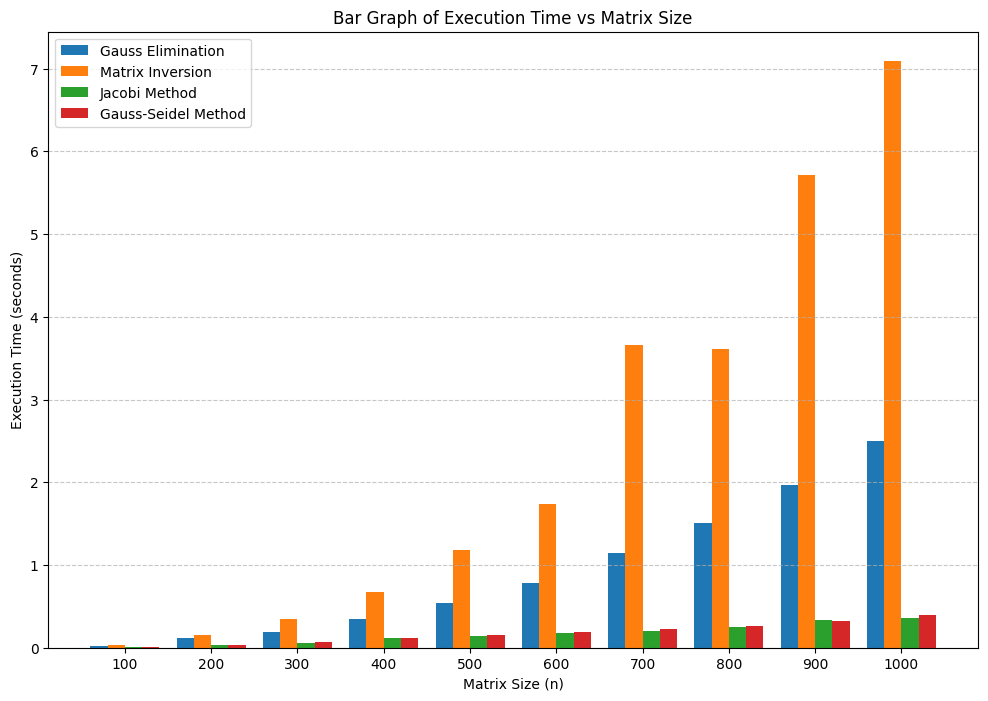

In [ ]:
err = 1e-6
n = 100 # starting term

n_values = []
times_GaussElim = []
times_InvMat = []
times_Jacobi = []
times_GaussSeidel = []

for i in range(10):
  print(f"Matrix Size: {n}x{n}")

  A = randmat(n)
  b = randvec(n)
  n_values.append(n)

  start = time.time()
  GaussElim(A, b)
  times_GaussElim.append(time.time() - start)

  start = time.time()
  InvMat(A, b)
  times_InvMat.append(time.time() - start)

  start = time.time()
  Jacobi(A, b, err)
  times_Jacobi.append(time.time() - start)

  start = time.time()
  GaussSeidel(A, b, err)
  times_GaussSeidel.append(time.time() - start)

  n += 100 # update term

# line graph
plt.figure(figsize=(12, 8))
plt.plot(n_values, times_GaussElim, color="#1f77b4", label="Gauss Elimination", marker="o")
plt.plot(n_values, times_InvMat, color="#ff7f0e", label="Matrix Inversion", marker="o")
plt.plot(n_values, times_Jacobi, color="#2ca02c", label="Jacobi Method", marker="o")
plt.plot(n_values, times_GaussSeidel, color="#d62728", label="Gauss-Seidel Method", marker="o")

plt.xlabel("Matrix Size (n)")
plt.ylabel("Execution Time (seconds)")
plt.title("Line Graph of Execution Time vs Matrix Size")
plt.legend()
plt.grid(True)
plt.show()

# bar graph
bar_width = 0.2
index = np.arange(len(n_values))

plt.figure(figsize=(12, 8))
plt.bar(index, times_GaussElim, bar_width, color="#1f77b4", label="Gauss Elimination")
plt.bar(index + bar_width, times_InvMat, bar_width, color="#ff7f0e", label="Matrix Inversion")
plt.bar(index + 2 * bar_width, times_Jacobi, bar_width,  color="#2ca02c", label="Jacobi Method")
plt.bar(index + 3 * bar_width, times_GaussSeidel, bar_width, color="#d62728", label="Gauss-Seidel Method")

plt.xlabel("Matrix Size (n)")
plt.ylabel("Execution Time (seconds)")
plt.title("Bar Graph of Execution Time vs Matrix Size")
plt.xticks(index + 1.5 * bar_width, n_values)  # Aligning the labels with the bars
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()